In [137]:
#importing all python libraries needed for the analysis of reviews
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
#downloading nltk libraries for the analysis
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# loading the reviews on pandas and assigning header to the columns
col_names = ['ratings', 'applications', 'reviews']
df = pd.read_csv('reviews_Apps_for_Android_5.training.txt', sep="	", names=col_names, header=None)

# print the output.
df.head()

,ratings,applications,reviews
0,2,B004A9SDD8,"Loves the song, so he really couldn't wait to ..."
1,3,B004A9SDD8,"Oh, how my little grandson loves this app. He'..."
2,3,B004A9SDD8,I found this at a perfect time since my daught...
3,3,B004A9SDD8,My 1 year old goes back to this game over and ...
4,3,B004A9SDD8,There are three different versions of the song...


In [4]:
# loading the reviews on pandas and assigning header to the columns
col_names = ['ratings', 'applications', 'reviews']
df2 = pd.read_csv('reviews_Apps_for_Android_5.test.txt', sep="	", names=col_names, header=None)

# print the output.
df2.head()

,ratings,applications,reviews
0,3,B004K4RY9M,I am a person who has always enjoyed word game...
1,3,B004K4RY9M,Love this. I try to beat my own time to see h...
2,3,B004K4RY9M,This game is fun and it can also be alearning ...
3,3,B004K4RY9M,I enjoy these puzzles have books of them keep ...
4,3,B004K4RY9M,Have spent many enjoyable hours playing this g...


In [5]:
#defining a function that can preprocess reviews before vectorization. Here the function accepts a string of text as argument.
def preprocess(text):
    #Convert text to lowercase using the lower() attribute
    text = text.lower()
    #removing digits and numbers
    filtered_text= re.sub(r'\d+', '', text)
    #Tokenize the text using the word_tokenize()
    tokens = word_tokenize(filtered_text)
    #list of english stop words are imported using the stopwords.words() and converted into a set using the set()
    stop_words = set(stopwords.words('english'))
    #the for loop scans the list of tokens and checks for any word that is not in the set of stop words and if found
    #stores the word in the list, 'filtered_tokens'
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Perform POS tagging on the filtered_tokens by using the pos_tag() function that takes a list of filtered tokens  
    #and returns a list of tuples, where each tuple contains a word and its corresponding part-of-speech tag.
    tagged_tokens = pos_tag(filtered_tokens)
    # assigning the WordNetLemmatizer() to the word 'lemmatizer'
    lemmatizer = WordNetLemmatizer()
    #using the python list comprehension, we use the for loop to iterate through the tagged_tokens. 
    #the conditional statement checks if the word and their POS tags corresponds to the first letters of the POS tags- 
    # adjectives, nouns, and verbs in their lower case forms. if condition is met, the word and tag is lemmatized using 
    #the lemmatizer.lemmatize() and appended to the lemma_tokens, else the word alone is lemmatized
    lemma_tokens = [lemmatizer.lemmatize(token[0], pos = token[1][0].lower()) if token[1][0].lower() in ['a', 'n', 'v'] 
                    else lemmatizer.lemmatize(token[0]) for token in tagged_tokens]
    # Converting the list of lemmatized tokens into a string using the join() function and using a space as a delimiter 
    #this makes it easy for the tfidf vectorizer to process
    preprocessed_text = ' '.join(lemma_tokens)
    #output of function
    return preprocessed_text

In [6]:
# Pre-process the reviews by applying the preprocess method
training_data = df['reviews'].apply(preprocess)
#assigning the ratings column to the variable: training_labels
training_labels = df['ratings']
#outputting the reviews stored in training_data
training_data

0        love song , really could n't wait play . littl...
1        oh , little grandson love app . 's always ask ...
2        find perfect time since daughter 's favorite s...
3        year old go back game . simple easy toddler us...
4        three different version song . game keep occup...
                               ...                        
19996    particular word search challenge one timed fin...
19997    hard use . finger would n't pick word right fr...
19998    keep mind sharp , good eye hand coordination ,...
19999    really fun one - great kindle fire airplane wo...
20000    love word game always enjoy word search puzzle...
Name: reviews, Length: 20001, dtype: object

In [7]:
#Pre-process the testing reviews
testing_data = df2['reviews'].apply(preprocess)
#assigning the ratings column to the variable: testing_labels
testing_labels = df2['ratings']
#outputting the reviews stored in testing_data
print(testing_data)

0        person always enjoy word game thiis one excell...
1        love . try beat time see fast complete . keep ...
2        game fun also alearning game . recomend age . ...
3        enjoy puzzle book keep entertained hour . grea...
4        spend many enjoyable hour play game would reco...
                               ...                        
19994    game alot fun cause silly . upper lvs big pain...
19995    well , almost see angry bird cultural phenomen...
19996    love game . good thing ca n't update game . ev...
19997    really fun game , wife score contest even . gr...
19998    nice update graphic find start pretty hard som...
Name: reviews, Length: 19999, dtype: object


In [50]:
#Calling the TfidfVectorizer() and assigning  maximum features of 10000
train_tfidf_vectorizer = TfidfVectorizer(max_features = 10000)

In [51]:
#Calling the CountVectorizer() and assigning maximum features of 10000
training_count_vectorizer = CountVectorizer(max_features = 10000)

In [60]:
#transforming the training data to a matrix of TF-IDF features
training_tfidf_instance = train_tfidf_vectorizer.fit_transform(training_data)
training_tfidf_instance

<20001x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 388278 stored elements in Compressed Sparse Row format>

In [61]:
#trans the training data to a matrix of BOW features
training_BOW_instance = training_count_vectorizer.fit_transform(training_data)
training_BOW_instance

<20001x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 388278 stored elements in Compressed Sparse Row format>

In [54]:
#extracting the TF-IDF features using get_feature_names() and assigning to training_words
#this will be used as a parameter for training the testing vectorizer
training_words = train_tfidf_vectorizer.get_feature_names()

In [55]:
#extracting the BOW features using get_feature_names() and assigning to training_words_2
training_words_2 = training_count_vectorizer.get_feature_names()

In [56]:
#Assigning the same features to the test_tfidf_vectorizer using 
#the vocabulary argument which takes in the features stored in the training words
test_tfidf_vectorizer = TfidfVectorizer(vocabulary = training_words)

In [57]:
#Assigning the same features to the test_tfidf_vectorizer using vocabulary
test_BOW_vectorizer = CountVectorizer(vocabulary = training_words_2)

In [58]:
#transforming the reviews of the testing data to tfidf numerical values
test_tfidf_instance = test_tfidf_vectorizer.fit_transform(testing_data)
test_tfidf_instance

<19999x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 382682 stored elements in Compressed Sparse Row format>

In [59]:
#transforming the reviews of the testing data to tfidf numerical values
test_BOW_instance = test_BOW_vectorizer.fit_transform(testing_data)
test_BOW_instance

<19999x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 382682 stored elements in Compressed Sparse Row format>

###  The performance of  five algorithms was compared on the *TF-IDF* vectorizer and the *CountVectorizer*. These algorithms are decision tree (dt), support vector machine (svm), k-nearest neigbour (knn), multinomial naive bayes (nb), and random forests (rf).

In [99]:
#assigning the classification models to variables in the order: decision tree, Support Vector Machine, 
# K-Nearest Neigbour, multinomial naive bayes and the random forest
dt_classifier = tree.DecisionTreeClassifier()
svm_classifier= SVC(kernel='linear', probability=True)
knn_classifier= KNeighborsClassifier(n_neighbors=25)#after several computations, n_neighbors=25, gave the highest accuracy
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)#the n_estimators=100 is the number of trees and the 
#random_state=42 ensures the results are consistent

In [100]:
#print statement
print('training classifiers on TFIDF vectors')

#training the models with the TF-IDF vectorized training data
#first is the decision tree. then, Support Vector Machine, K-Nearest Neigbour, 
# multinomial naive bayes and the random forest
#assigning the training dataset and labels to the algorithms using the fit function
#assigning the training dataset and labels to the algorithm using the fit function
dt_classifier.fit(training_tfidf_instance, training_labels)
svm_classifier.fit(training_tfidf_instance, training_labels)
knn_classifier.fit(training_tfidf_instance, training_labels)
nb_classifier.fit(training_tfidf_instance, training_labels)
rf_classifier.fit(training_tfidf_instance, training_labels)

#print statement to display successful training
print('training finished successfully')

training classifiers on TFIDF vectors
training finished successfully


In [101]:
#print statement
print('getting predictions of test instances using tfidf vectorizer')

#getting the predictions of each classifier using the TF-IDF test instances
dt_predicted_labels = dt_classifier.predict(test_tfidf_instance)
svm_predicted_labels = svm_classifier.predict(test_tfidf_instance)
knn_predicted_labels = knn_classifier.predict(test_tfidf_instance)
nb_predicted_labels = nb_classifier.predict(test_tfidf_instance)
rf_predicted_labels = rf_classifier.predict(test_tfidf_instance)

#print statement
print('predictions complete')

getting predictions of test instances using tfidf vectorizer
predictions complete


In [102]:
#print statement
print('predicted outputs of TF-IDF test instances\n')

#printing output of each classifier that made predictions with the TF-IDF vectorizer 
#test data in sequence: decision tree, SVM, KNN, Multinomial naive bayes and Random forest
print('Decision Tree:', dt_predicted_labels)
print('SVM:', svm_predicted_labels)
print('KNN:', knn_predicted_labels)
print('Naive Bayes:', nb_predicted_labels)
print('Random Forest:', rf_predicted_labels)

predicted outputs of TF-IDF test instances

Decision Tree: [2 3 3 ... 3 3 3]
SVM: [3 3 3 ... 3 3 3]
KNN: [3 3 3 ... 3 3 3]
Naive Bayes: [3 3 3 ... 3 3 3]
Random Forest: [3 3 3 ... 3 3 3]


In [103]:
#print statement
print('training classifiers on CountVectorizer')

#training the models with the bag of words vectorized training data
#first is the decision tree. then, Support Vector Machine, K-Nearest Neigbour, 
# multinomial naive bayes and the random forest
#assigning the training dataset and labels to the algorithms using the fit function
dt_classifier.fit(training_BOW_instance, training_labels)
svm_classifier.fit(training_BOW_instance, training_labels)
knn_classifier.fit(training_BOW_instance, training_labels)
nb_classifier.fit(training_BOW_instance, training_labels)
rf_classifier.fit(training_BOW_instance, training_labels)

#print statement to display successful training
print('training finished successfully')

training classifiers on CountVectorizer
training finished successfully


In [104]:
#print statement
print('getting predictions of test instances using countVectorizer')

#getting the predictions of each classifier using the CountVectorizer test instances
dt_predicted_labels_2 = dt_classifier.predict(test_BOW_instance)
svm_predicted_labels_2 = svm_classifier.predict(test_BOW_instance)
knn_predicted_labels_2 = knn_classifier.predict(test_BOW_instance)
nb_predicted_labels_2 = nb_classifier.predict(test_BOW_instance)
rf_predicted_labels_2 = rf_classifier.predict(test_BOW_instance)

#print statement
print('predictions complete')

getting predictions of test instances using countVectorizer
predictions complete


In [105]:
#print statement
print('predicted output of countVectorizer test instances\n')

#printing output of each classifier that made predictions with the CountVectorizer 
#test data in sequence: decision tree, SVM, KNN, Multinomial naive bayes and Random forest
print('Decision Tree:', dt_predicted_labels_2)
print('SVM:', svm_predicted_labels_2)
print('KNN:', knn_predicted_labels_2)
print('Naive Bayes:', nb_predicted_labels_2)
print('Random forest:', rf_predicted_labels_2)

predicted output of countVectorizer test instances

Decision Tree: [2 3 2 ... 1 2 3]
SVM: [3 3 3 ... 3 3 3]
KNN: [3 3 3 ... 3 3 3]
Naive Bayes: [3 3 3 ... 1 3 3]
Random forest: [3 3 3 ... 3 3 3]


### The next four cells show the classification reports of each algorithm. According to the classification reports, SVM outperformed other algorithms in terms of accuracy and f1_score of the three ratings on the TF-IDF vectorizer and Random forest performed best in CountVectorizer. However, the *TF-IDF* vectorizer performed better on average and so, the SVM was chosen.

In [106]:
#compute and print classification report: precision, recall, and fmeasure for each TF-IDF classification label
#in sequence: decision tree, SVM, KNN, Multinomial naive bayes and Random forest
print('TF-IDF Decision tree:', '\n', classification_report(testing_labels, dt_predicted_labels, zero_division= 0))
print()
print('TF-IDF SUPPORT VECTOR MACHINE:', '\n', classification_report(testing_labels, svm_predicted_labels, zero_division= 0))
print()
print('TF-IDF KNN ALGORITHM:', '\n', classification_report(testing_labels, knn_predicted_labels, zero_division= 0))
print()
print('TF-IDF NAIVE BAYES:', '\n', classification_report(testing_labels, nb_predicted_labels, zero_division= 0))
print()
print('TF-IDF RANDOM FOREST:', '\n', classification_report(testing_labels, rf_predicted_labels, zero_division= 0))

TF-IDF Decision tree: 
               precision    recall  f1-score   support

           1       0.45      0.39      0.41      3469
           2       0.22      0.21      0.21      2087
           3       0.81      0.84      0.82     14443

    accuracy                           0.69     19999
   macro avg       0.49      0.48      0.48     19999
weighted avg       0.68      0.69      0.69     19999


TF-IDF SUPPORT VECTOR MACHINE: 
               precision    recall  f1-score   support

           1       0.66      0.51      0.58      3469
           2       0.49      0.11      0.18      2087
           3       0.82      0.96      0.88     14443

    accuracy                           0.79     19999
   macro avg       0.66      0.53      0.55     19999
weighted avg       0.76      0.79      0.76     19999


TF-IDF KNN ALGORITHM: 
               precision    recall  f1-score   support

           1       0.72      0.22      0.33      3469
           2       0.49      0.02      0.04   

In [107]:
#Evaluating accuracy result of classifiers for tf-idf model
#in this sequence: decision tree, SVM, KNN, Multinomial naive bayes and Random forest
dt_accuracy = accuracy_score(testing_labels, dt_predicted_labels)
svm_accuracy = accuracy_score(testing_labels, svm_predicted_labels)
knn_accuracy = accuracy_score(testing_labels, knn_predicted_labels)
nb_accuracy = accuracy_score(testing_labels, nb_predicted_labels)
rf_accuracy = accuracy_score(testing_labels, rf_predicted_labels)

#print the accuracy results of each model using the f string
#in this sequence: decision tree, SVM, KNN, Multinomial naive bayes and Random forest
print(f'Decision Tree accuracy: {dt_accuracy:.3f}')
print(f'SVM accuracy: {svm_accuracy:.3f}')
print(f'KNN accuracy: {knn_accuracy:.3f}')
print(f'Naive_bayes accuracy: {nb_accuracy:.3f}')
print(f'random forest accuracy: {rf_accuracy:.3f}')

Decision Tree accuracy: 0.694
SVM accuracy: 0.791
KNN accuracy: 0.753
Naive_bayes accuracy: 0.732
random forest accuracy: 0.765


In [108]:
#compute and print classification report: precision, recall, and fmeasure for each CountVectorizer classification label
#in sequence: decision tree, SVM, KNN, Multinomial naive bayes and Random forest
dt_classification_report_2 = classification_report(testing_labels, dt_predicted_labels_2, zero_division= 0)
svm_classification_report_2 = classification_report(testing_labels, svm_predicted_labels_2, zero_division= 0)
knn_classification_report_2 = classification_report(testing_labels, knn_predicted_labels_2, zero_division= 0)
nb_classification_report_2 = classification_report(testing_labels, nb_predicted_labels_2, zero_division= 0)
rf_classification_report_2 = classification_report(testing_labels, rf_predicted_labels_2, zero_division= 0)

print('Decision tree:', '\n', dt_classification_report_2)
print()
print('SUPPORT VECTOR MACHINE:', '\n', svm_classification_report_2)
print()
print('KNN ALGORITHM:', '\n', knn_classification_report_2)
print()
print('NAIVE BAYES:', '\n', nb_classification_report_2)
print()
print('RANDOM FOREST:', '\n', rf_classification_report_2)

Decision tree: 
               precision    recall  f1-score   support

           1       0.45      0.41      0.43      3469
           2       0.21      0.19      0.20      2087
           3       0.81      0.84      0.82     14443

    accuracy                           0.70     19999
   macro avg       0.49      0.48      0.48     19999
weighted avg       0.68      0.70      0.69     19999


SUPPORT VECTOR MACHINE: 
               precision    recall  f1-score   support

           1       0.56      0.55      0.55      3469
           2       0.29      0.23      0.26      2087
           3       0.85      0.88      0.86     14443

    accuracy                           0.75     19999
   macro avg       0.57      0.55      0.56     19999
weighted avg       0.74      0.75      0.75     19999


KNN ALGORITHM: 
               precision    recall  f1-score   support

           1       0.41      0.14      0.21      3469
           2       0.24      0.02      0.04      2087
           3 

In [109]:
#Evaluating accuracy result of classifiers for CountVectorizer models
#in this sequence: decision tree, SVM, KNN, Multinomial naive bayes and Random forest
dt_accuracy_bow= accuracy_score(testing_labels, dt_predicted_labels_2)
svm_accuracy_bow = accuracy_score(testing_labels, svm_predicted_labels_2)
knn_accuracy_bow = accuracy_score(testing_labels, knn_predicted_labels_2)
nb_accuracy_bow = accuracy_score(testing_labels, nb_predicted_labels_2)
rf_accuracy_bow = accuracy_score(testing_labels, rf_predicted_labels_2)

#printing the accuracy results of each model using the f string
#in this sequence: decision tree, SVM, KNN, Multinomial naive bayes and Random forest
print(f'Decision Tree accuracy: {dt_accuracy_bow:.3f}')
print(f'SVM accuracy: {svm_accuracy_bow:.3f}')
print(f'KNN accuracy: {knn_accuracy_bow:.3f}')
print(f'Naive_bayes accuracy: {nb_accuracy_bow:.3f}')
print(f'random forest accuracy: {rf_accuracy_bow:.3f}')

Decision Tree accuracy: 0.696
SVM accuracy: 0.755
KNN accuracy: 0.719
Naive_bayes accuracy: 0.763
random forest accuracy: 0.765


### PART 2: Testing company reviews with the trained *SVM*. This is because the *TF-IDF* vectorizer performed better than the countVectorizer. the *SVM* outperformed other algorithms when used with the *TF-IDF* vectorizer.

In [110]:
#reviews for the first company AAD_1 = B004NWLM8K, B004Q1NH4U, B004LPBTAA
#reviews for the second company AAD_2 = B004S6NAOU, B004R6HTWU, B004N8KDNY
#reviews for the second company AAD_3 = B004KA0RBS, B004NPELDA, B004L26XXQ

#loading the reviews on pandas and assigning header to the columns
col_names = ['ratings', 'applications', 'reviews']
df2 = pd.read_csv('reviews_Apps_for_Android_5.test.txt', sep="	", names=col_names, header=None)

#define column values to filter on
AAD_1 = df2.loc[df2['applications'].isin(['B004NWLM8K', 'B004Q1NH4U', 'B004LPBTAA'])]

#output column
print(AAD_1)

       ratings applications                                            reviews
3694         3   B004LPBTAA  I compared all the sudoku games I downloaded a...
3695         3   B004LPBTAA  I am a Sudoku beginner but I play all the game...
3696         3   B004LPBTAA  I put this on the Kindle just to keep the kids...
3697         3   B004LPBTAA  I really like the format--how it operates. The...
3698         3   B004LPBTAA  I have played Sudoku on many different levels,...
...        ...          ...                                                ...
12513        3   B004Q1NH4U  My little guy (2 yo) has shown little interest...
12514        3   B004Q1NH4U  One Fish Two Fish Red Fish Blue Fish-Dr. Seuss...
12515        3   B004Q1NH4U  I bought this app d for my granddaughter she l...
12516        3   B004Q1NH4U  I loved reading reading Dr. Seuss books to my ...
12517        3   B004Q1NH4U  Dr. Seuss is and was a genius even though you ...

[107 rows x 3 columns]


In [111]:
#loading the reviews on pandas and assigning header to the columns
col_names = ['ratings', 'applications', 'reviews']
df2 = pd.read_csv('reviews_Apps_for_Android_5.test.txt', sep="	", names=col_names, header=None)

#define column values to filter on
AAD_2 = df2.loc[df2['applications'].isin(['B004S6NAOU', 'B004R6HTWU', 'B004N8KDNY'])]

#output column
print(AAD_2)

       ratings applications                                            reviews
8574         2   B004N8KDNY  but this ain't no plants vs zombies. h vs a is...
8575         2   B004N8KDNY  Honestly I think this app would be very useful...
8576         1   B004N8KDNY  just a terrible copy of plants versus zombies....
8577         3   B004N8KDNY  I've never played &quot;Plants vs Zombies&quot...
8578         1   B004N8KDNY  As other reviewers have said, this is very sim...
...        ...          ...                                                ...
18260        3   B004S6NAOU  The resin why I am going to get this game is b...
18261        3   B004S6NAOU  It's a fun game. It's short and sweet but fun....
18262        3   B004S6NAOU  It's an addictive game . Definitley works out ...
18263        3   B004S6NAOU  I had no problem with. this app and by the way...
18264        3   B004S6NAOU  I luv this App a lot! I first played it in my ...

[296 rows x 3 columns]


In [112]:
#loading the reviews on pandas and assigning header to the columns
col_names = ['ratings', 'applications', 'reviews']
df2 = pd.read_csv('reviews_Apps_for_Android_5.test.txt', sep="	", names=col_names, header=None)

#define column values to filter on
AAD_3 = df2.loc[df2['applications'].isin(['B004KA0RBS', 'B004NPELDA', 'B004L26XXQ'])]

#output column
print(AAD_3)

      ratings applications                                            reviews
1277        1   B004KA0RBS  really bad development. not worth .99 or being...
1278        1   B004KA0RBS  I download nearly every Amazon FAOTD and try t...
1279        1   B004KA0RBS  Don't waste your money! This app is rediculous...
1280        1   B004KA0RBS  Not worth a buck. Actually it's just a waste o...
1281        1   B004KA0RBS  whether you play the easy level or other level...
...       ...          ...                                                ...
9472        2   B004NPELDA  The app description is more exciting than the ...
9473        2   B004NPELDA  I rather liked this app.  Fireworks are illega...
9474        1   B004NPELDA  I tried it out because a while back because it...
9475        1   B004NPELDA  doesn't launch, needs to be fixed, until then ...
9476        1   B004NPELDA  Watchdog reported cpu usage over 80% on my def...

[168 rows x 3 columns]


In [113]:
#Pre-process the AAD_1 reviews
testing_AAD_1 = AAD_1['reviews'].apply(preprocess)
#assigning the ratings column to the variable testing_labels_AAD_1
testing_labels_AAD_1 = AAD_1['ratings']
#outputting the preprocessed AAD_1 reviews
#print(testing_AAD_1)

In [114]:
#Pre-process the AAD_2 reviews
testing_AAD_2 = AAD_2['reviews'].apply(preprocess)
#assigning the ratings column to the variable testing_labels_AAD_2
testing_labels_AAD_2 = AAD_2['ratings']
#outputting the preprocessed AAD_2 reviews
#print(testing_AAD_2)

In [115]:
#Pre-process the AAD_3 reviews
testing_AAD_3 = AAD_3['reviews'].apply(preprocess)
#assigning the ratings column to the variable testing_labels_AAD_3
testing_labels_AAD_3 = AAD_3['ratings']
#outputting the preprocessed AAD_2 reviews
#print(testing_AAD_3)

In [116]:
#Assigning the same features to the test_tfidf_vectorizer using 
#the vocabulary argument which takes in the features stored in the training words
test_tfidf_vectorizer_AAD_1 = TfidfVectorizer(vocabulary = training_words)
#transforming the reviews of the AAD_1 testing data to tfidf numerical values
test_tfidf_instance_AAD_1 = test_tfidf_vectorizer_AAD_1.fit_transform(testing_AAD_1)

In [117]:
#Assigning the same features to the test_tfidf_vectorizer using 
#the vocabulary argument which takes in the features stored in the training words
test_tfidf_vectorizer_AAD_2 = TfidfVectorizer(vocabulary = training_words)
#transforming the reviews of the AAD_2 testing data to tfidf numerical values
test_tfidf_instance_AAD_2 = test_tfidf_vectorizer_AAD_2.fit_transform(testing_AAD_2)

In [118]:
#Assigning the same features to the test_tfidf_vectorizer using 
#the vocabulary argument which takes in the features stored in the training words
test_tfidf_vectorizer_AAD_3 = TfidfVectorizer(vocabulary = training_words)
#transforming the reviews of the AAD_1 testing data to tfidf numerical values
test_tfidf_instance_AAD_3 = test_tfidf_vectorizer_AAD_3.fit_transform(testing_AAD_3)

In [119]:
#print statement
print('getting predictions of test instances')
#getting predictions from the trained Decision tree algorithm
predicted_labels_svm_AAD_1 = svm_classifier.predict(test_tfidf_instance_AAD_1)
print(predicted_labels_svm_AAD_1)

getting predictions of test instances
[3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [120]:
#compute classification, recall and fmeasure for each classification label of AAD_1
print(classification_report(testing_labels_AAD_1, predicted_labels_svm_AAD_1, zero_division= 0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           3       0.96      0.97      0.97       103

    accuracy                           0.93       107
   macro avg       0.48      0.49      0.48       107
weighted avg       0.93      0.93      0.93       107



In [121]:
#print statement
print('getting predictions of test instances')
#getting predictions from the trained Decision tree algorithm
predicted_labels_svm_AAD_2 = svm_classifier.predict(test_tfidf_instance_AAD_2)
print(predicted_labels_svm_AAD_2)

getting predictions of test instances
[3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 1 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 1 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3
 3 1 1 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 3 1 1 1 3 1 1 3 1
 3 1 3 3 1 1 3 1 3 3 1 3 3 3 3 1 3 3 1 3 1 1 3 3 1 3 1 3 3 1 3 3 1 3 1 3 3
 3 3 3 1 3 1 3 3 1 3 3 3 1 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 1 1 3 3 3 1 3 3 3
 3 3 3 3 3 3 1 3 1 3 3 3 1 1 2 3 3 3 1 3 1 3 3 2 3 3 3 1 3 3 1 3 3 3 3 3 3]


In [122]:
#compute classification, recall and fmeasure for each classification label of AAD_2
print(classification_report(testing_labels_AAD_2, predicted_labels_svm_AAD_2, zero_division= 0))

              precision    recall  f1-score   support

           1       0.76      0.44      0.56       109
           2       0.00      0.00      0.00        53
           3       0.55      0.94      0.69       134

    accuracy                           0.59       296
   macro avg       0.44      0.46      0.42       296
weighted avg       0.53      0.59      0.52       296



In [123]:
#print statement
print('getting predictions of test instances')
#getting predictions from the trained Decision tree algorithm
predicted_labels_svm_AAD_3 = svm_classifier.predict(test_tfidf_instance_AAD_3)
print(predicted_labels_svm_AAD_3)

getting predictions of test instances
[3 3 1 1 3 3 1 3 3 1 3 3 3 3 3 1 3 3 3 3 3 1 3 1 3 1 3 3 3 3 3 1 1 1 3 3 3
 3 1 3 3 1 3 3 3 3 3 1 3 1 1 3 1 3 3 3 1 1 1 1 3 3 3 3 3 1 3 3 3 3 3 1 3 3
 3 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 3 1 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 1 3 1 3
 1 3 3 3 1 3 3 3 1 3 3 3 1 1 3 3 3 3 3 3 1 1 1 3 1 1 1 3 1 1 3 3 3 3 1 1 3
 3 3 3 1 3 1 3 1 3 1 3 1 1 3 1 3 3 3 1 3]


In [124]:
#compute classification, recall and fmeasure for each classification label of AAD_3
print(classification_report(testing_labels_AAD_3, predicted_labels_svm_AAD_3, zero_division= 0))

              precision    recall  f1-score   support

           1       0.85      0.42      0.56       109
           2       0.00      0.00      0.00        22
           3       0.30      0.92      0.45        37

    accuracy                           0.48       168
   macro avg       0.38      0.45      0.34       168
weighted avg       0.62      0.48      0.47       168



In [131]:
#evaluate accuracy of each company using their original labels and predicted SVM labels
AAD_1_accuracy = accuracy_score(testing_labels_AAD_1, predicted_labels_svm_AAD_1)
AAD_2_accuracy = accuracy_score(testing_labels_AAD_2, predicted_labels_svm_AAD_2)
AAD_3_accuracy = accuracy_score(testing_labels_AAD_3, predicted_labels_svm_AAD_3)
#outputting accuracy result in three decimal places using the f string 
print(f'AAD_1 accuracy: {AAD_1_accuracy * 100:.3f}%')
print(f'AAD_2 accuracy: {AAD_2_accuracy * 100:.3f}%')
print(f'AAD_3 accuracy: {AAD_3_accuracy * 100:.3f}%')

AAD_1 accuracy: 93.458%
AAD_2 accuracy: 58.784%
AAD_3 accuracy: 47.619%


#### From the accuracy report above, the company,*AAD_1*, has the highest f1 score on the rating of 3 and precision of *0.96* Followed by *AAD_2* with precision of *0.55*, then *AAD_3* with precision of *0.30*. 

#### Also, *AAD_2* and *AAD_3* have the same f1 score on the rating of 1 with *AAD_3* having precision of *0.85*, followed by *AAD_2* with precision of *0.76*. Lastly, *AAD_1* with precision of *0.00*

#### Overall, from the accuracy and classification results, the *AAD_1* application is the best of the three applications because it has the highest *accuracy* and the highest *f1_score* on the rating of 3.

In [135]:
# Getting the confidence level of the SVM
confidences = svm_classifier.predict_proba(test_tfidf_instance_AAD_1)

# Print the accuracy score and the confidence level mean of the SVM in 2 decimal places
print("Accuracy: {:.2f}%".format(AAD_1_accuracy * 100))
print("Confidence level: {:.2f}%".format(100 * (1-abs(confidences).mean())))

Accuracy: 93.46%
Confidence level: 66.67%


In [127]:
# Getting the confidence level of the SVM
confidences = svm_classifier.predict_proba(test_tfidf_instance_AAD_2)

# Print the accuracy score and the confidence level mean of the SVM in 2 decimal places
print("Accuracy: {:.2f}%".format(AAD_2_accuracy * 100))
print("Confidence level: {:.2f}%".format(100 * (1 - abs(confidences).mean())))

Accuracy: 58.78%
Confidence level: 66.67%


In [136]:
# Getting the confidence level of the SVM
confidences = svm_classifier.predict_proba(test_tfidf_instance_AAD_3)

# Print the accuracy score and the confidence level mean of the SVM in 2 decimal places
print("Accuracy: {:.2f}%".format(AAD_3_accuracy * 100))
print("Confidence level: {:.2f}%".format(100 * (1 - abs(confidences).mean())))

Accuracy: 47.62%
Confidence level: 66.67%


### visualisations of the classification report for each android application based on ratings

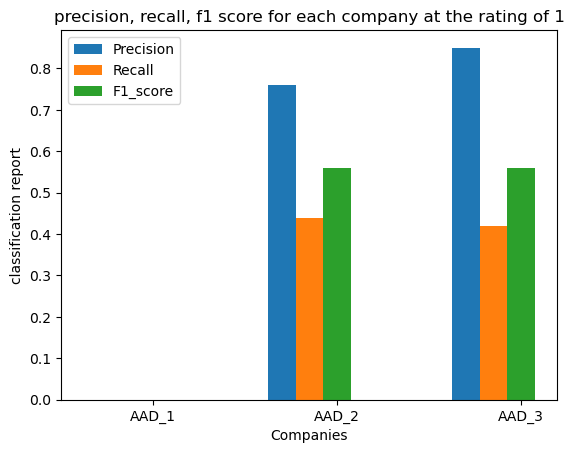

In [138]:
#android application companies
companies = ['AAD_1', 'AAD_2', 'AAD_3']

# precision, recall and f1 score for each company for rating of 1
Precision =  [0.00, 0.76, 0.85]
Recall =     [0.00, 0.44, 0.42]
F1_score =   [0.00, 0.56, 0.56]

# Set up the figure and axis
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.15

# Set the x coordinates for each category's bars
x_pos1 = np.arange(len(companies))
x_pos2 = [x + bar_width for x in x_pos1]
x_pos3 = [x + bar_width for x in x_pos2]

# Create the bars for each category
ax.bar(x_pos1, Precision, width=bar_width, label='Precision')
ax.bar(x_pos2, Recall, width=bar_width, label='Recall')
ax.bar(x_pos3, F1_score, width=bar_width, label='F1_score')

# Set the axis labels and title
ax.set_xlabel('Companies')
ax.set_ylabel('classification report')
ax.set_title('precision, recall, f1 score for each company at the rating of 1')

# Set the x-axis tick labels
ax.set_xticks(x_pos3)
ax.set_xticklabels(companies)

# Add a legend
#ax.legend(bbox_to_anchor=(1.02, 1))
ax.legend()

# Show the plot
plt.show()


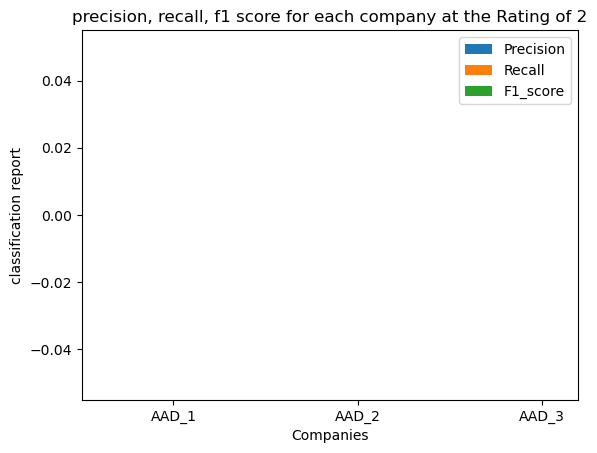

In [139]:
#Android application companies
companies = ['AAD_1', 'AAD_2', 'AAD_3']

# precision, recall and f1 score for each company for rating of 1
Precision =  [0.00, 0.00, 0.00]
Recall =     [0.00, 0.00, 0.00]
F1_score =   [0.00, 0.00, 0.00]


# Set up the figure and axis
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.15

# Set the x coordinates for each category's bars
x_pos1 = np.arange(len(companies))
x_pos2 = [x + bar_width for x in x_pos1]
x_pos3 = [x + bar_width for x in x_pos2]

# Create the bars for each category
ax.bar(x_pos1, Precision, width=bar_width, label='Precision')
ax.bar(x_pos2, Recall, width=bar_width, label='Recall')
ax.bar(x_pos3, F1_score, width=bar_width, label='F1_score')

# Set the axis labels and title
ax.set_xlabel('Companies')
ax.set_ylabel('classification report')
ax.set_title('precision, recall, f1 score for each company at the Rating of 2')

# Set the x-axis tick labels
ax.set_xticks(x_pos3)
ax.set_xticklabels(companies)

# Add a legend
ax.legend()

# Show the plot
plt.show()

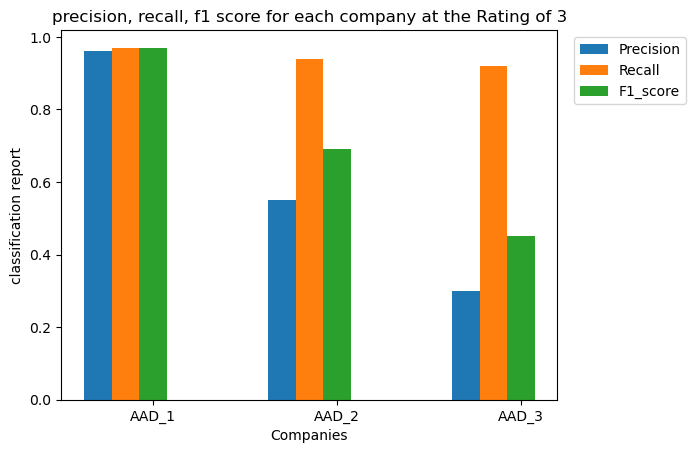

In [140]:
#Android application companies
companies = ['AAD_1', 'AAD_2', 'AAD_3']

# precision, recall and f1 score for each company for rating of 1
Precision =  [0.96, 0.55, 0.30]
Recall =     [0.97, 0.94, 0.92]
F1_score =   [0.97, 0.69, 0.45]


# Set up the figure and axis
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.15

# Set the x coordinates for each category's bars
x_pos1 = np.arange(len(companies))
x_pos2 = [x + bar_width for x in x_pos1]
x_pos3 = [x + bar_width for x in x_pos2]

# Create the bars for each category
ax.bar(x_pos1, Precision, width=bar_width, label='Precision')
ax.bar(x_pos2, Recall, width=bar_width, label='Recall')
ax.bar(x_pos3, F1_score, width=bar_width, label='F1_score')

# Set the axis labels and title
ax.set_xlabel('Companies')
ax.set_ylabel('classification report')
ax.set_title('precision, recall, f1 score for each company at the Rating of 3')

# Set the x-axis tick labels
ax.set_xticks(x_pos3)
ax.set_xticklabels(companies)

# Add a legend
ax.legend(bbox_to_anchor=(1.02, 1))

# Show the plot
plt.show()